# Домашняя работа №7.

* Написать модель Random Forest на датасет больных сердечными болезнями (можно почистить от выбросов).

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = "http://yustiks.ru/dataset/cardio_train.csv"
data = pd.read_csv(url,sep=";")
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
# Как видим, в данном датасете нет пустых значений. 

In [5]:
# Удалим столбец id, который не несет смысловой нагрузки

In [6]:
data.drop(columns='id', inplace=True)

In [7]:
# Посмотрим, что лежит в таргете

In [8]:
data.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [9]:
# Проверим датасет на дубликаты

In [10]:
data[data.duplicated()]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10562,20495,1,165,70.0,120,80,1,1,0,0,1,0
21784,16793,1,165,68.0,120,80,1,1,0,0,1,0
38505,18988,1,164,65.0,120,80,1,1,0,0,1,0
40365,14552,1,158,64.0,120,80,1,1,0,0,1,0
42450,18353,1,169,67.0,120,80,1,1,0,0,1,0
44653,16937,2,170,70.0,120,80,1,1,0,0,0,0
45125,21280,1,165,65.0,120,80,1,1,0,0,1,0
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1
45810,21230,1,164,62.0,120,80,1,1,0,0,1,0
48917,21945,1,165,60.0,120,80,1,1,0,0,1,0


In [11]:
data.duplicated().sum()

24

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().sum()

0

In [14]:
# Удалили дубликаты

In [15]:
# Добавим столбец, который показывает возраст в годах (у нас возраст указан в днях)

In [16]:
data['age_year'] = data.age/365

In [17]:
data.drop(columns='age', inplace=True)

In [18]:
# Заменим вес и рост на показатель индекса массы тела (массу тела в кг делим на рост(в м) в квадрате)

In [19]:
data['bmi'] = data['weight']/((data['height']/100)**2)

In [20]:
data.drop(columns=['weight','height'], inplace=True)

In [21]:
data.describe()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,bmi
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,1.349648,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771,53.339589,27.557610
std,0.476862,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004,6.759930,6.092210
min,1.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583562,3.471784
25%,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.394521,23.875115
50%,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.980822,26.391837
75%,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.430137,30.222222
max,2.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967123,298.666667


In [22]:
# Странный показатель по bmi, удалим значения < 10 и > 100.

In [23]:
data = data[(data['bmi'] < 100) & (data['bmi'] > 10)]

In [24]:
# Видим, странное отклонение в ap_hi и ap_lo между медианой и максимальным и минимальным значением. 

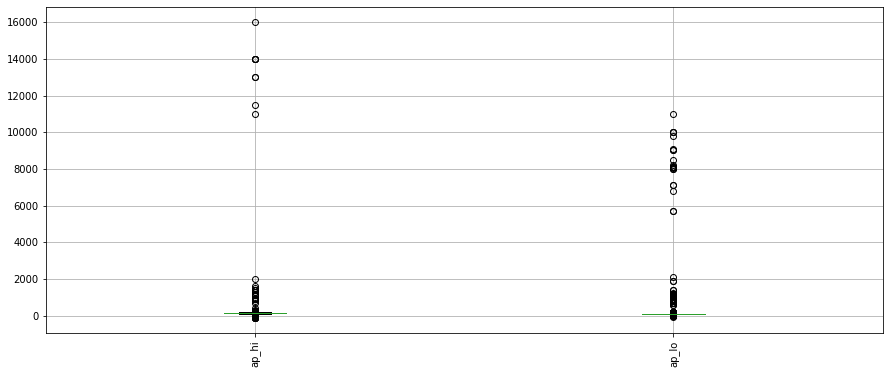

In [25]:
data[['ap_hi', 'ap_lo']].boxplot(figsize=(15,6), rot=90)

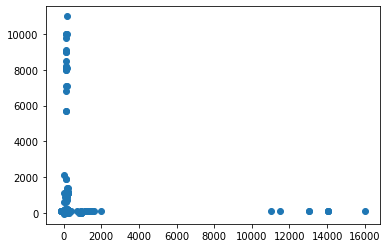

In [26]:
plt.scatter(data.ap_hi, data.ap_lo)
plt.show()

In [27]:
# В данных есть выбросы. Почистим наш датасет.

In [28]:
quant = data.quantile([0.01, 0.99])
quant

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,bmi
0.01,1.0,90.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,39.632877,18.612245
0.99,2.0,180.0,1000.0,3.0,3.0,1.0,1.0,1.0,1.0,64.353425,44.220861


In [29]:
data1 = data[(data['ap_lo'] < 400) & (data['ap_lo'] > 20)]

In [30]:
data_wo = data1[(data1['ap_hi'] < 400) & (data1['ap_hi'] > 20)]

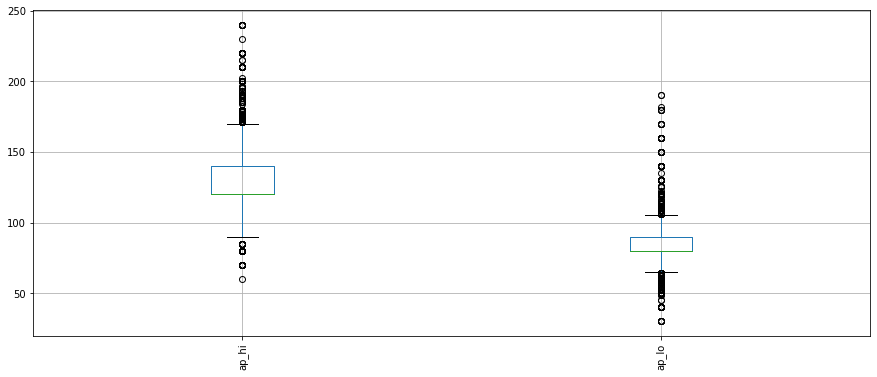

In [31]:
data_wo[['ap_hi', 'ap_lo']].boxplot(figsize=(15,6), rot=90)

In [32]:
data_wo.describe()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,bmi
count,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000
mean,1.348825,126.616093,81.377272,1.364904,1.226133,0.088017,0.053634,0.803390,0.494987,53.327818,27.470627
std,0.476602,16.762988,9.689221,0.679090,0.572118,0.283322,0.225296,0.397438,0.499979,6.762106,5.289774
min,1.000000,60.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583562,10.726644
25%,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.378082,23.875115
50%,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.975342,26.346494
75%,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.421918,30.119376
max,2.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967123,95.221607


In [33]:
# Разделим данные на тестовую и обучающую выборки

In [34]:
y = data_wo['cardio']
y.shape

(68725,)

In [35]:
X = data_wo.drop(columns='cardio')
X.shape

(68725, 10)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = RandomForestClassifier(n_estimators=100)

In [40]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, y_pred))

model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      6945
           1       0.71      0.69      0.70      6800

    accuracy                           0.70     13745
   macro avg       0.70      0.70      0.70     13745
weighted avg       0.70      0.70      0.70     13745



0.7039650782102582

No handles with labels found to put in legend.


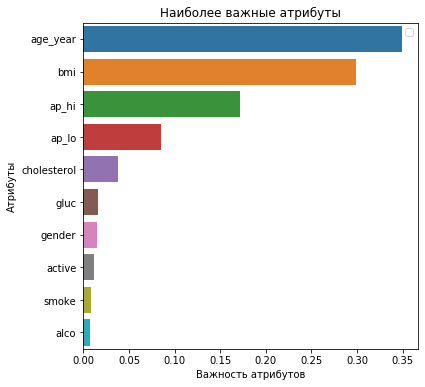

In [44]:
headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

Данный датасет разобран в начале лекции 5. 

Модель Random Forest при обучении дает такой метод как feature importance, используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

* Сделать вывод о том, какой атрибут оказывает значительное влияение на наличие или отсутствие болезни.

Основная задача: определить, что влияет на сердечную болезнь больше всего. Например, выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравниваем курящих пациентов с некурящими, и определяя насколько статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима).
    Выдвигаем гипотезу на самый важный атрибут, полученный из feature_importance (Random_Forest). И оцениваем гипотезу. И делаем вывод.

In [45]:
# По feature_importances_ получается, что возраст максимально влияет на болезнь. 

In [70]:
data_wo.describe()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,bmi
count,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000,68725.000000
mean,1.348825,126.616093,81.377272,1.364904,1.226133,0.088017,0.053634,0.803390,0.494987,53.327818,27.470627
std,0.476602,16.762988,9.689221,0.679090,0.572118,0.283322,0.225296,0.397438,0.499979,6.762106,5.289774
min,1.000000,60.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583562,10.726644
25%,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.378082,23.875115
50%,1.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.975342,26.346494
75%,2.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.421918,30.119376
max,2.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967123,95.221607


In [69]:
# Рассмотрим две группы людей старше 55 и младше.

In [71]:
data_old = data_wo[data_wo.age_year>55].cardio
data_young = data_wo[data_wo.age_year<=55].cardio

In [72]:
import researchpy as rp

In [73]:
descriptives, results = rp.ttest(data_old, data_young)

In [74]:
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0    cardio  30633.0  0.605426  0.488767  0.002793   0.599952  0.610899
1    cardio  38092.0  0.406175  0.491124  0.002516   0.401242  0.411107
2  combined  68725.0  0.494987  0.499979  0.001907   0.491249  0.498725
_______________________________________
                Independent t-test     results
0  Difference (cardio - cardio) =       0.1993
1            Degrees of freedom =   68723.0000
2                             t =      52.9776
3         Two side test p value =       0.0000
4        Difference < 0 p value =       1.0000
5        Difference > 0 p value =       0.0000
6                     Cohen's d =       0.4066
7                     Hedge's g =       0.4066
8                 Glass's delta =       0.4077
9                             r =       0.1981


In [75]:
# two-side p-value < 0.05, поэтому можно сказать что имеется статистическое различие между атрибутами.

In [76]:
stats.ttest_ind(data_old, data_young)

Ttest_indResult(statistic=52.977590724655464, pvalue=0.0)

In [77]:
# Получается, что более взрослые люди чаще страдают от кардиозаболеваний, что логично